<a href="https://colab.research.google.com/github/SumeetCEH/SumeetsAI/blob/main/House_Price_Prediction_%26_K_Fold_Technique_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("housing (2).csv")

In [4]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

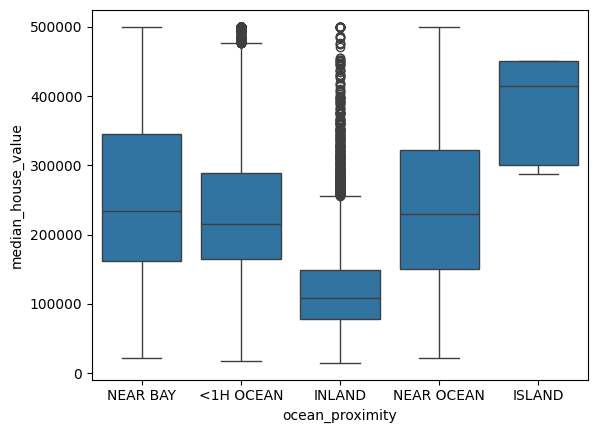

In [7]:
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value')

In [8]:
#sns.pairplot(df)

In [9]:
df.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

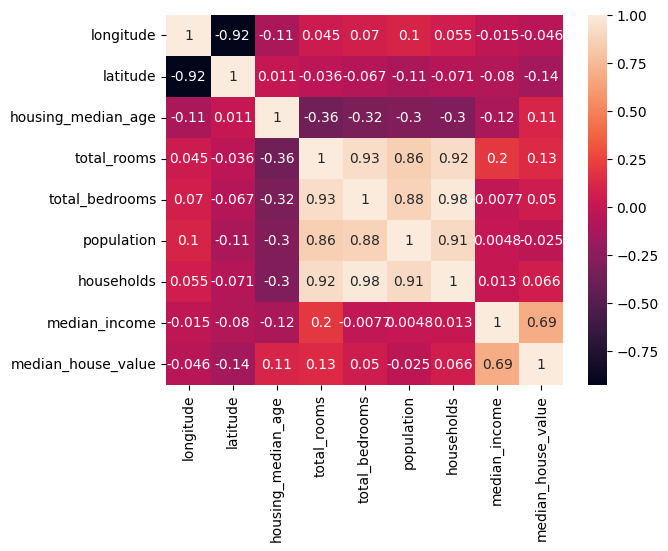

In [10]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='total_bedrooms', ylabel='Count'>

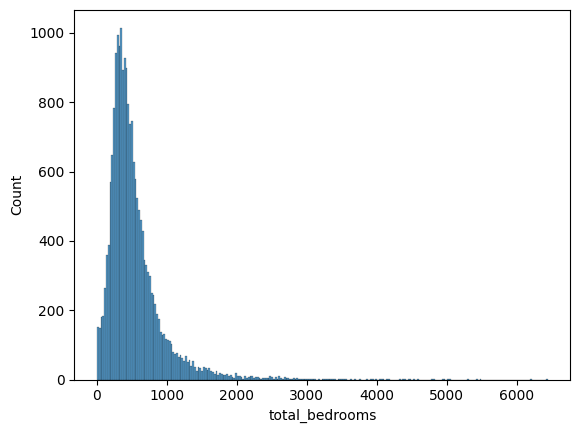

In [11]:
sns.histplot(df['total_bedrooms'])

In [12]:
res=df['total_bedrooms'].median()

In [13]:
df['total_bedrooms'].fillna(res,inplace=True)

<ipython-input-13-42758a72c0be>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(res,inplace=True)


In [14]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
df['ocean_proximity'] = le.fit_transform(df['ocean_proximity'])

In [17]:
X=df.drop('median_house_value',axis=1)

In [18]:
y=df['median_house_value']

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [20]:
y = sc.fit_transform(y.values.reshape(-1, 1))

In [21]:
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [23]:
y

array([[ 2.12963148],
       [ 1.31415614],
       [ 1.25869341],
       ...,
       [-0.99274649],
       [-1.05860847],
       [-1.01787803]])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#X_train, X_test, y_train, y_test = train_test_split(
 #   X, y, test_size=0.33, random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
X

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  1.2910888 ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.2910888 ],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.2910888 ],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.11673923],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -0.11673923],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -0.11673923]])

In [28]:
X_test.shape

NameError: name 'X_test' is not defined

In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()

In [ ]:
scores=cross_val_score(rfr, X, y, cv=3,scoring='neg_mean_squared_error')
print(scores.mean())

In [ ]:
rfr.fit(X_train,y_train)

In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knr= KNeighborsRegressor()

In [ ]:
scores=cross_val_score(knr, X, y, cv=3,scoring='neg_mean_squared_error')
print(scores.mean())

In [ ]:
knr.fit(X_train,y_train)

In [ ]:
y_pred=knr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor()

In [ ]:
scores=cross_val_score(dtr, X, y, cv=3,scoring='neg_mean_squared_error')
print(scores.mean())

In [ ]:
dtr.fit(X_train,y_train)

In [ ]:
y_pred=dtr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
scores=cross_val_score(lr, X, y, cv=3,scoring='neg_mean_squared_error')
print(scores.mean())

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
import keras

In [ ]:
model=keras.Sequential()


In [ ]:
model.summary()

In [ ]:
model.add(
    keras.Input(shape=(9,))
)

In [ ]:
model.add(keras.layers.Dense(
    32,
    activation='relu',
))

In [ ]:
model.add(keras.layers.Dense(
    64,
    activation='relu',
))

In [ ]:
model.add(keras.layers.Dense(
    1,
    activation='linear',
))

In [ ]:
model.compile(
    optimizer="adam",
    loss='mse',
    metrics=['mae'],
)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=10,
    verbose="auto",
    validation_data=(X_test,y_test)
)


In [ ]:
model.evaluate(X_test,y_test)